<a href="https://colab.research.google.com/github/DB9653/Bachelorarbeit/blob/main/NSIT_IIITDWD_(TrainH19_TestH20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/roushan-raj/HASOC-2020/blob/master/Models/German%20Models/German%20Sub-task%20A.ipynb


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'


# Dataset Reading


In [ ]:
import pandas as pd 
#data = pd.read_excel('/content/hasoc_2020_de_train_new_a.xlsx', converters={'tweet_id':int})
data = pd.read_csv("/content/german_dataset2019.tsv",sep="\t")
pd.set_option('display.max_colwidth',150)
data.head(10)

,text_id,text,task_1,task_2
0,hasoc_de_1,Frank Rennicke – Ich bin stolz https://t.co/Cm6TD8w1k1 https://t.co/qynXso07Zn,NOT,NONE
1,hasoc_de_2,ANSEHEN.....und danach bitte TEILEN...TEILEN....TEILEN.... https://t.co/z18lnbOWRQ,NOT,NONE
2,hasoc_de_3,"#Koeln Mohamed erkennt kein deutsches Recht sondern nur die #Scharia an. Das er den Kölner Dom kaputt machen wollte, war nur ein Scherz aber wenn ...",NOT,NONE
3,hasoc_de_4,#SaudiArabien ist eine brutale islamische Diktatur und richtete kürzlich fünf Männer wegen ihre Homosexualität hin. Welche Konsequenzen hat das fü...,NOT,NONE
4,hasoc_de_5,"Bundespolizei #München hat im 1. Quartal 2019 rund 3.380 illegale Einreisen registriert, die Migranten stammten v. a. aus Nigeria, Afghanistan, Se...",NOT,NONE
5,hasoc_de_6,"#1EuropaFuerAlle oder wie es die #SPD heute noch bildhafteter formuliert hat: Und willst Du nicht mein Bruder sein, so schlage ich Dir denn Sch...",NOT,NONE
6,hasoc_de_7,"#Hannover: Weil ihm die Freizeitgestaltung und ihr Umgang mit Männern nicht passt, tritt und schlägt Mustafa F. (26) auf seine ehemalige -nach isl...",NOT,NONE
7,hasoc_de_8,#Deutschland 2019: Ort für die #EU-Wahlparty der #AfD wurde gerade gekündigt. Vermieter und Mieter wurden massiv von #Linksextremisten bedroht. Da...,NOT,NONE
8,hasoc_de_9,"#Innsbruck: Tirolerin und Türke knacken 2018 zahlreiche Automaten bei Auto-Waschanlagen und Tankstellen, anhand dort gefundener DNA kommt heraus, ...",NOT,NONE
9,hasoc_de_10,"#Wien: Vier Nigerianer bestellen teils hochpreisige Produkte unter falschen Namen, holen sie in Paketshops ab und behalten sie, ohne zu bezahlen -...",NOT,NONE


In [ ]:
data.shape

(3819, 4)

In [ ]:
print(data.dtypes)

text_id    object
text       object
task_1     object
task_2     object
dtype: object


# Making of "label" Variable


In [ ]:
label = data['task_1']
label.head()

0    NOT
1    NOT
2    NOT
3    NOT
4    NOT
Name: task_1, dtype: object

# Checking Dataset Balancing


NOT    3412
HOF     407
Name: task_1, dtype: int64


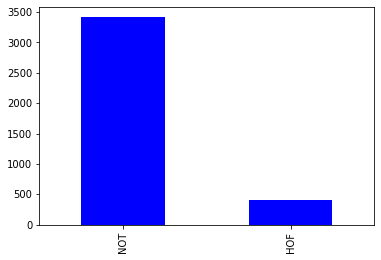

In [ ]:
print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')

# Converting label into "0" or "1"


In [ ]:
import numpy as np
classes_list = ["HOF","NOT"]
label_index = data['task_1'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:10])



[1 1 1 1 1 1 1 1 1 1]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=2)

In [ ]:
print(label_twoDimension[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Making of "text" Variable


In [ ]:
text = data['text']
text.head(10)



0                                                                           Frank Rennicke – Ich bin stolz https://t.co/Cm6TD8w1k1 https://t.co/qynXso07Zn
1                                                                       ANSEHEN.....und danach bitte TEILEN...TEILEN....TEILEN.... https://t.co/z18lnbOWRQ
2    #Koeln Mohamed erkennt kein deutsches Recht sondern nur die #Scharia an. Das er den Kölner Dom kaputt machen wollte, war nur ein Scherz aber wenn ...
3    #SaudiArabien ist eine brutale islamische Diktatur und richtete kürzlich fünf Männer wegen ihre Homosexualität hin. Welche Konsequenzen hat das fü...
4    Bundespolizei #München hat im 1. Quartal 2019 rund 3.380 illegale Einreisen registriert, die Migranten stammten v. a. aus Nigeria, Afghanistan, Se...
5    #1EuropaFuerAlle oder wie es die #SPD heute noch bildhafteter formuliert hat:    Und willst Du nicht mein Bruder sein, so schlage ich Dir denn Sch...
6    #Hannover: Weil ihm die Freizeitgestaltung und ihr Umgang mit Män

# Dataset Pre-processing


In [ ]:
def remove_umlaut(string):
    """
    Removes umlauts from strings and replaces them with the letter+e convention
    :param string: string to remove umlauts from
    :return: unumlauted string
    """
    u = 'ü'.encode()
    U = 'Ü'.encode()
    a = 'ä'.encode()
    A = 'Ä'.encode()
    o = 'ö'.encode()
    O = 'Ö'.encode()
    ss = 'ß'.encode()

    string = string.encode()
    string = string.replace(u, b'ue')
    string = string.replace(U, b'Ue')
    string = string.replace(a, b'ae')
    string = string.replace(A, b'Ae')
    string = string.replace(o, b'oe')
    string = string.replace(O, b'Oe')
    string = string.replace(ss, b'ss')

    string = string.decode('utf-8')
    return string

In [ ]:
text_wo_umlauts = text.apply(lambda x:remove_umlaut(x))
text_wo_umlauts.head(10)

0                                                                           Frank Rennicke – Ich bin stolz https://t.co/Cm6TD8w1k1 https://t.co/qynXso07Zn
1                                                                       ANSEHEN.....und danach bitte TEILEN...TEILEN....TEILEN.... https://t.co/z18lnbOWRQ
2    #Koeln Mohamed erkennt kein deutsches Recht sondern nur die #Scharia an. Das er den Koelner Dom kaputt machen wollte, war nur ein Scherz aber wenn...
3    #SaudiArabien ist eine brutale islamische Diktatur und richtete kuerzlich fuenf Maenner wegen ihre Homosexualitaet hin. Welche Konsequenzen hat da...
4    Bundespolizei #Muenchen hat im 1. Quartal 2019 rund 3.380 illegale Einreisen registriert, die Migranten stammten v. a. aus Nigeria, Afghanistan, S...
5    #1EuropaFuerAlle oder wie es die #SPD heute noch bildhafteter formuliert hat:    Und willst Du nicht mein Bruder sein, so schlage ich Dir denn Sch...
6    #Hannover: Weil ihm die Freizeitgestaltung und ihr Umgang mit Mae

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text = text_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text.head(10)

0                                                                                                                         frank rennicke   ich bin stolz  
1                                                                                              ansehen.....und danach bitte teilen...teilen....teilen.... 
2     koeln mohamed erkennt kein deutsches recht sondern nur die  scharia an. das er den koelner dom kaputt machen wollte, war nur ein scherz aber wenn...
3     saudiarabien ist eine brutale islamische diktatur und richtete kuerzlich fuenf maenner wegen ihre homosexualitaet hin. welche konsequenzen hat da...
4    bundespolizei  muenchen hat im 1. qua al 2019 rund 3.380 illegale einreisen registrie , die migranten stammten v. a. aus nigeria, afghanistan, ser...
5     1europafueralle oder wie es die  spd heute noch bildhafteter formulie  hat:    und willst du nicht mein bruder sein, so schlage ich dir denn scha...
6     hannover: weil ihm die freizeitgestaltung und ihr umgang mit mae

# Removing stopwords


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_ns.head(10))

0                                                                                                                                 frank rennicke   stolz  
1                                                                                              ansehen.....und danach bitte teilen...teilen....teilen.... 
2                                     koeln mohamed erkennt deutsches recht  scharia an. koelner dom kaputt wollte, scherz knast rauskommt, mitleid mehr. 
3     saudiarabien brutale islamische diktatur richtete kuerzlich fuenf maenner wegen homosexualitaet hin. konsequenzen fuer verhaeltnis saudi-arabien ...
4    bundespolizei  muenchen 1. qua al 2019 rund 3.380 illegale einreisen registrie , migranten stammten v. a. nigeria, afghanistan, serbien, albanien ...
5     1europafueralle  spd heute bildhafteter formulie  hat:    willst bruder sein, schlage schaedel ein.     jusos  nospd  baseballschlaeger   niewied...
6     hannover: freizeitgestaltung umgang maennern passt, tritt schlae

# Lemmatization

# Stemming

In [ ]:


# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text



In [ ]:
clean_text_stem = clean_text_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_stem.head())

0                                                                                                                                 frank rennicke   stolz  
1                                                                                              ansehen.....und danach bitte teilen...teilen....teilen.... 
2                                     koeln mohamed erkennt deutsches recht  scharia an. koelner dom kaputt wollte, scherz knast rauskommt, mitleid mehr. 
3     saudiarabien brutale islamische diktatur richtete kuerzlich fuenf maenner wegen homosexualitaet hin. konsequenzen fuer verhaeltnis saudi-arabien ...
4    bundespolizei  muenchen 1. qua al 2019 rund 3.380 illegale einreisen registrie , migranten stammten v. a. nigeria, afghanistan, serbien, albanien ...
Name: text, dtype: object


# Tokenization using "keras"


In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)

# Making Vocab for words


In [ ]:
vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)

16849


In [ ]:


l = tok_all.word_index
print(l)



{'fuer': 1, 'afd': 2, 'deutschland': 3, 'mal': 4, 'mehr': 5, 'geld': 6, 'e': 7, 'ha': 8, 'ueber': 9, 'schon': 10, 'ja': 11, 'immer': 12, 'spd': 13, 'gruenen': 14, 'wer': 15, 'geht': 16, 'ungebeten1': 17, 'ist': 18, 'en': 19, 'nicht': 20, 'polizei': 21, 'merkel': 22, 'gibt': 23, '1': 24, 'amp': 25, 'pa': 26, 'heute': 27, '2': 28, 'wurde': 29, 'rebecca': 30, 'werden': 31, 'warum': 32, 'cdu': 33, 'u': 34, 'via': 35, 'land': 36, 'eu': 37, 'berlin': 38, 'realjohr': 39, 'menschen': 40, 'ab': 41, 'deutsche': 42, 'frau': 43, 'gruene': 44, 's': 45, 'junge': 46, 'haben': 47, 'hat': 48, 'ei': 49, 'a': 50, 'koennen': 51, 'beim': 52, 'endlich': 53, 'fluechtlinge': 54, 'kommt': 55, 'findbecci': 56, 'ganz': 57, 'gut': 58, 'welt': 59, 'leben': 60, 'jahre': 61, 'europa': 62, 'wird': 63, 'macht': 64, 'finjafinte': 65, 'sein': 66, 'seit': 67, 'jahren': 68, 'waere': 69, 'muessen': 70, 'die': 71, 'viele': 72, 'bitte': 73, 'wegen': 74, '2019': 75, 'an': 76, 'mdl': 77, 'deutschen': 78, 'mann': 79, 'wohl': 80

# encoding or sequencing


In [ ]:
encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[0])
print(encoded_clean_text_stem[0])

frank rennicke   stolz  
[932, 6275, 546]


# Pre-padding


In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')

# Reading Test data and Pre-processing


In [ ]:
data_t = pd.read_csv('/content/hasoc20test_improved.csv')
pd.set_option('display.max_colwidth',150)
data_t.head(10)



,Unnamed: 0,tweet_id,text,task1,task2,ID
0,0,1129095874242650112,@derCarsti Boykottieren hört sich besser an. 💙💙,NOT,NONE,hasoc_2020_de_1053
1,1,1129004308396236800,"RT @ibikus31: Es wird spekuliert, ob Merkel ein Amt in Brüssel übernimmt.\nWäre es so, wie schätzen Sie dann die Zukunft der Mitgliedstaaten…",NOT,NONE,hasoc_2020_de_671
2,2,1130896929355907080,Hat #Hitler wirklich den Krieg in der Wüste verloren? Nach der #Welt Schlagzeile hat die #Tagesschau nicht reagiert.,NOT,NONE,hasoc_2020_de_2977
3,3,1132251534329307136,"RT @Beatrix_vStorch: #May tritt in UK unter Tränen zurück. Wenn #Merkel zurücktritt, dann auch unter Tränen – unter den Freudentränen von M…",NOT,NONE,hasoc_2020_de_1746
4,4,1124941869115498496,@justmeDoro Eher nicht. Das Gänse hauen wieder ab in ihre warmen Überwinterungsquartiere. 😅😂,NOT,NONE,hasoc_2020_de_2416
5,5,1129712298531184641,"RT @VonSchwer: Ein guter Patriot geht von Bord‼️Gestürzt durch einen, vom ZDF finanzierten, linken Schmierenkomödianten 😡‼️ https://t.co/rl…",HOF,OFFN,hasoc_2020_de_1112
6,6,1123981478361219073,@yooli_derechte @MontanaBlack Mich wundert es echt wie du noch keine Cockschelle bekommen hast. Du kinderfickender Hurensohn,HOF,OFFN,hasoc_2020_de_2938
7,7,1124978296628961287,Da war #SPD #Kuehnert und am Ende auch #Nahles einfach nur dumm: https://t.co/aj001ZKeWk,NOT,NONE,hasoc_2020_de_2205
8,8,1129473948813541376,"Nazan, komm bittebitte zurück, löse die „Punggdä“-Trulla ab und werde wieder LD-Moderatorin! 🙏🏻 #letsdance2019 #letsdance",NOT,NONE,hasoc_2020_de_387
9,9,1131048922527424512,"RT @Junge_Freiheit: Die europäische Spitzenkandidatin der Grünen im Europawahlkampf, Franziska Keller, hat sich für eine CO2-Steuer ausgesp…",NOT,NONE,hasoc_2020_de_459


In [ ]:
data_t.shape

(526, 6)

In [ ]:
print(data_t.dtypes)

Unnamed: 0     int64
tweet_id       int64
text          object
task1         object
task2         object
ID            object
dtype: object


In [ ]:


label_t = data_t['task1']
label_t.head()



0    NOT
1    NOT
2    NOT
3    NOT
4    NOT
Name: task1, dtype: object

NOT    365
HOF    161
Name: task1, dtype: int64


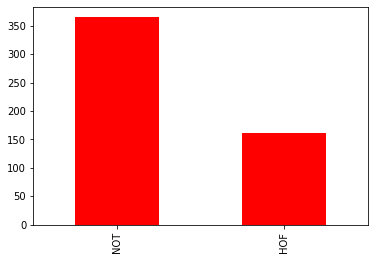

In [ ]:
print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')

In [ ]:


import numpy as np
classes_list_t = ["HOF","NOT"]
label_t_index = data_t['task1'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])



[1 1 1 1 1 0 0 1 1 1]


In [ ]:


from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=2)



In [ ]:
print(label_twoDimension_t[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:


text_t = data_t['text']
text_t.head(10)



0                                                                                                  @derCarsti Boykottieren hört sich besser an. 💙💙
1    RT @ibikus31: Es wird spekuliert, ob Merkel ein Amt in Brüssel übernimmt.\nWäre es so, wie schätzen Sie dann die Zukunft der Mitgliedstaaten…
2                             Hat #Hitler wirklich den Krieg in der Wüste verloren? Nach der #Welt Schlagzeile hat die #Tagesschau nicht reagiert.
3     RT @Beatrix_vStorch: #May tritt in UK unter Tränen zurück. Wenn #Merkel zurücktritt, dann auch unter Tränen – unter den Freudentränen von M…
4                                                     @justmeDoro Eher nicht. Das Gänse hauen wieder ab in ihre warmen Überwinterungsquartiere. 😅😂
5     RT @VonSchwer: Ein guter Patriot geht von Bord‼️Gestürzt durch einen, vom ZDF finanzierten, linken Schmierenkomödianten 😡‼️ https://t.co/rl…
6                     @yooli_derechte @MontanaBlack Mich wundert es echt wie du noch keine Cockschelle bekommen hast. 

In [ ]:
test_wo_umlauts = text_t.apply(lambda x: remove_umlaut(x))

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text_t = test_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text_t.head(10)

0                                                                                                      dercarsti boykottieren hoe  sich besser an.   
1         ibikus31: es wird spekulie , ob merkel ein amt in bruessel uebernimmt. waere es so, wie schaetzen sie dann die zukunft der mitgliedstaaten 
2                                hat  hitler wirklich den krieg in der wueste verloren  nach der  welt schlagzeile hat die  tagesschau nicht reagie .
3       beatrix vstorch:  may tritt in uk unter traenen zurueck. wenn  merkel zuruecktritt, dann auch unter traenen   unter den freudentraenen von m 
4                                                        justmedoro eher nicht. das gaense hauen wieder ab in ihre warmen ueberwinterungsqua iere.   
5                          vonschwer: ein guter patriot geht von bord  gestuerzt durch einen, vom zdf finanzie en, linken schmierenkomoedianten      
6                          yooli derechte  montanablack mich wunde  es echt wie du noch keine cocksc

In [ ]:


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))

0                                                                                dercarsti boykottieren hoe  besser an.   
1                        ibikus31: spekulie , merkel amt bruessel uebernimmt. waere so, schaetzen zukunft mitgliedstaaten 
2                                            hitler wirklich krieg wueste verloren   welt schlagzeile  tagesschau reagie .
3                        beatrix vstorch:  may tritt uk traenen zurueck.  merkel zuruecktritt, traenen   freudentraenen m 
4                                                justmedoro eher nicht. gaense hauen ab warmen ueberwinterungsqua iere.   
5                 vonschwer: guter patriot geht bord  gestuerzt einen, zdf finanzie en, linken schmierenkomoedianten      
6                            yooli derechte  montanablack wunde  echt cockschelle bekommen hast. kinderfickender hurensohn
7                                                                                spd  kuehne  ende  nahles einfach dumm:  
8               

# Stemming

In [ ]:
# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_t_stem.head(10))

0                                                                                dercarsti boykottieren hoe  besser an.   
1                        ibikus31: spekulie , merkel amt bruessel uebernimmt. waere so, schaetzen zukunft mitgliedstaaten 
2                                            hitler wirklich krieg wueste verloren   welt schlagzeile  tagesschau reagie .
3                        beatrix vstorch:  may tritt uk traenen zurueck.  merkel zuruecktritt, traenen   freudentraenen m 
4                                                justmedoro eher nicht. gaense hauen ab warmen ueberwinterungsqua iere.   
5                 vonschwer: guter patriot geht bord  gestuerzt einen, zdf finanzie en, linken schmierenkomoedianten      
6                            yooli derechte  montanablack wunde  echt cockschelle bekommen hast. kinderfickender hurensohn
7                                                                                spd  kuehne  ende  nahles einfach dumm:  
8               

In [ ]:


import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)



In [ ]:


vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)



2687


In [ ]:
test_list = tok_test.word_index
print(test_list)

{'einfach': 1, 'deutsche': 2, 'arsch': 3, 'merkel': 4, 'fuer': 5, 'schon': 6, 'gruenen': 7, 'scheiss': 8, 'gt': 9, 'ab': 10, 'mal': 11, 'halt': 12, 'linken': 13, 'dumm': 14, 'porno': 15, 'welt': 16, 'hurensohn': 17, 'immer': 18, 'nazis': 19, 'frau': 20, 'mehr': 21, 'scheisse': 22, 'frauen': 23, 'ja': 24, 'zurueck': 25, 'gratis': 26, 'echt': 27, 'gruene': 28, 'warum': 29, 'tagesschau': 30, 'islam': 31, 'gibt': 32, 'en': 33, 'kinder': 34, 'ficken': 35, 'pack': 36, 'heute': 37, 'idioten': 38, 'ueber': 39, 'hoe': 40, 'besser': 41, 'lange': 42, 'eu': 43, 'dumme': 44, 'e': 45, 'schulz': 46, '3': 47, 'linke': 48, 'wuerde': 49, 'erst': 50, 'leben': 51, 'bild': 52, 'europa': 53, 'ist': 54, 'kopf': 55, 's': 56, 'kurz': 57, '5': 58, '12': 59, 'hasse': 60, 'deutschland': 61, 'eigentlich': 62, 'fresse': 63, 'b': 64, 'gabriel': 65, 'neue': 66, 'an': 67, 'waere': 68, 'eher': 69, 'nicht': 70, 'ganzen': 71, 'lassen': 72, 'a': 73, 'grund': 74, 'kotzen': 75, 'de': 76, 'dummen': 77, 'ma': 78, 'afd': 79, '

In [ ]:


encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])



 dercarsti boykottieren hoe  besser an.   
[3863, 447, 225, 76]


In [ ]:


from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')



# FastText Embeddings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!gunzip /content/drive/MyDrive/cc.de.300.vec.gz

gzip: /content/drive/MyDrive/cc.de.300.vec.gz: No such file or directory


In [ ]:
# https://stackoverflow.com/questions/69964788/how-to-unzip-gz-file-using-google-colab

# FastText Embedding link - https://fasttext.cc/docs/en/crawl-vectors.html

import os
embeddings_index = {}
f = open('/content/drive/MyDrive/cc.de.300.vec',encoding='utf-8',errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 2000000 word vectors.


In [ ]:


embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector



# CNN 1 Model


In [ ]:


from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq



In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length)

In [ ]:
CNN1_network=Sequential([Embedding_Layer,
                        Conv1D(128,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dropout(0.3),
                       Dense(2,activation="sigmoid")
                       ])



In [ ]:
CNN1_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          5055000   
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          115328    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                        

In [ ]:
# https://stackoverflow.com/questions/62707558/importerror-cannot-import-name-adam-from-keras-optimizers
from tensorflow.keras.optimizers import Adam
CNN1_network.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN1_network, to_file='CNN2_model.png', show_shapes=True, show_layer_names=True)

from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



In [ ]:


from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



# Model Fitting or Training


In [ ]:
hist = CNN1_network.fit(padded_clean_text_stem,label_twoDimension,epochs=200,batch_size=32,callbacks=[earlystopper, reduce_lr])

Epoch 1/200
120/120 [==============================] - ETA: 0s - loss: 0.5260 - accuracy: 0.8903

120/120 [==============================] - 13s 8ms/step - loss: 0.5260 - accuracy: 0.8903 - lr: 3.0000e-05
Epoch 2/200
117/120 [============================>.] - ETA: 0s - loss: 0.3585 - accuracy: 0.8926

120/120 [==============================] - 1s 7ms/step - loss: 0.3562 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 3/200
119/120 [============================>.] - ETA: 0s - loss: 0.3452 - accuracy: 0.8936

120/120 [==============================] - 1s 7ms/step - loss: 0.3456 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 4/200
118/120 [============================>.] - ETA: 0s - loss: 0.3426 - accuracy: 0.8938

120/120 [==============================] - 1s 7ms/step - loss: 0.3432 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 5/200
113/120 [===========================>..] - ETA: 0s - loss: 0.3397 - accuracy: 0.8941

120/120 [==============================] - 1s 7ms/step - loss: 0.3407 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 6/200
117/120 [============================>.] - ETA: 0s - loss: 0.3374 - accuracy: 0.8929

120/120 [==============================] - 1s 7ms/step - loss: 0.3366 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 7/200
120/120 [==============================] - ETA: 0s - loss: 0.3358 - accuracy: 0.8934

120/120 [==============================] - 1s 7ms/step - loss: 0.3358 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 8/200
117/120 [============================>.] - ETA: 0s - loss: 0.3331 - accuracy: 0.8929

120/120 [==============================] - 1s 7ms/step - loss: 0.3318 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 9/200
119/120 [============================>.] - ETA: 0s - loss: 0.3295 - accuracy: 0.8931

120/120 [==============================] - 1s 7ms/step - loss: 0.3288 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 10/200
118/120 [============================>.] - ETA: 0s - loss: 0.3279 - accuracy: 0.8927

120/120 [==============================] - 1s 7ms/step - loss: 0.3264 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 11/200
117/120 [============================>.] - ETA: 0s - loss: 0.3206 - accuracy: 0.8940

120/120 [==============================] - 1s 7ms/step - loss: 0.3215 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 12/200
119/120 [============================>.] - ETA: 0s - loss: 0.3123 - accuracy: 0.8934

120/120 [==============================] - 1s 7ms/step - loss: 0.3122 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 13/200
118/120 [============================>.] - ETA: 0s - loss: 0.3034 - accuracy: 0.8933

120/120 [==============================] - 1s 7ms/step - loss: 0.3030 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 14/200
118/120 [============================>.] - ETA: 0s - loss: 0.2922 - accuracy: 0.8941

120/120 [==============================] - 1s 7ms/step - loss: 0.2932 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 15/200
113/120 [===========================>..] - ETA: 0s - loss: 0.2773 - accuracy: 0.8938

120/120 [==============================] - 1s 7ms/step - loss: 0.2773 - accuracy: 0.8934 - lr: 3.0000e-05
Epoch 16/200
120/120 [==============================] - ETA: 0s - loss: 0.2623 - accuracy: 0.8940

120/120 [==============================] - 1s 7ms/step - loss: 0.2623 - accuracy: 0.8940 - lr: 3.0000e-05
Epoch 17/200
118/120 [============================>.] - ETA: 0s - loss: 0.2439 - accuracy: 0.8957

120/120 [==============================] - 1s 7ms/step - loss: 0.2449 - accuracy: 0.8950 - lr: 3.0000e-05
Epoch 18/200
119/120 [============================>.] - ETA: 0s - loss: 0.2214 - accuracy: 0.9018

120/120 [==============================] - 1s 7ms/step - loss: 0.2216 - accuracy: 0.9018 - lr: 3.0000e-05
Epoch 19/200
118/120 [============================>.] - ETA: 0s - loss: 0.1980 - accuracy: 0.9121

120/120 [==============================] - 1s 7ms/step - loss: 0.1979 - accuracy: 0.9123 - lr: 3.0000e-05
Epoch 20/200
120/120 [==============================] - ETA: 0s - loss: 0.1716 - accuracy: 0.9288

120/120 [==============================] - 1s 7ms/step - loss: 0.1716 - accuracy: 0.9288 - lr: 3.0000e-05
Epoch 21/200
117/120 [============================>.] - ETA: 0s - loss: 0.1495 - accuracy: 0.9450

120/120 [==============================] - 1s 7ms/step - loss: 0.1501 - accuracy: 0.9440 - lr: 3.0000e-05
Epoch 22/200
117/120 [============================>.] - ETA: 0s - loss: 0.1307 - accuracy: 0.9559

120/120 [==============================] - 1s 7ms/step - loss: 0.1301 - accuracy: 0.9563 - lr: 3.0000e-05
Epoch 23/200
117/120 [============================>.] - ETA: 0s - loss: 0.1107 - accuracy: 0.9653

120/120 [==============================] - 1s 7ms/step - loss: 0.1100 - accuracy: 0.9657 - lr: 3.0000e-05
Epoch 24/200
115/120 [===========================>..] - ETA: 0s - loss: 0.0951 - accuracy: 0.9720

120/120 [==============================] - 1s 7ms/step - loss: 0.0962 - accuracy: 0.9720 - lr: 3.0000e-05
Epoch 25/200
119/120 [============================>.] - ETA: 0s - loss: 0.0831 - accuracy: 0.9795

120/120 [==============================] - 1s 7ms/step - loss: 0.0829 - accuracy: 0.9796 - lr: 3.0000e-05
Epoch 26/200
118/120 [============================>.] - ETA: 0s - loss: 0.0728 - accuracy: 0.9817

120/120 [==============================] - 1s 7ms/step - loss: 0.0726 - accuracy: 0.9819 - lr: 3.0000e-05
Epoch 27/200
118/120 [============================>.] - ETA: 0s - loss: 0.0629 - accuracy: 0.9852

120/120 [==============================] - 1s 7ms/step - loss: 0.0627 - accuracy: 0.9853 - lr: 3.0000e-05
Epoch 28/200
118/120 [============================>.] - ETA: 0s - loss: 0.0545 - accuracy: 0.9868

120/120 [==============================] - 1s 7ms/step - loss: 0.0543 - accuracy: 0.9869 - lr: 3.0000e-05
Epoch 29/200
117/120 [============================>.] - ETA: 0s - loss: 0.0462 - accuracy: 0.9899

120/120 [==============================] - 1s 7ms/step - loss: 0.0459 - accuracy: 0.9900 - lr: 3.0000e-05
Epoch 30/200
118/120 [============================>.] - ETA: 0s - loss: 0.0425 - accuracy: 0.9913

120/120 [==============================] - 1s 7ms/step - loss: 0.0423 - accuracy: 0.9914 - lr: 3.0000e-05
Epoch 31/200
114/120 [===========================>..] - ETA: 0s - loss: 0.0366 - accuracy: 0.9940

120/120 [==============================] - 1s 7ms/step - loss: 0.0368 - accuracy: 0.9940 - lr: 3.0000e-05
Epoch 32/200
117/120 [============================>.] - ETA: 0s - loss: 0.0323 - accuracy: 0.9947

120/120 [==============================] - 1s 7ms/step - loss: 0.0322 - accuracy: 0.9948 - lr: 3.0000e-05
Epoch 33/200
113/120 [===========================>..] - ETA: 0s - loss: 0.0304 - accuracy: 0.9942

120/120 [==============================] - 1s 7ms/step - loss: 0.0304 - accuracy: 0.9940 - lr: 3.0000e-05
Epoch 34/200
118/120 [============================>.] - ETA: 0s - loss: 0.0281 - accuracy: 0.9952

120/120 [==============================] - 1s 7ms/step - loss: 0.0280 - accuracy: 0.9953 - lr: 3.0000e-05
Epoch 35/200
117/120 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9960

120/120 [==============================] - 1s 7ms/step - loss: 0.0258 - accuracy: 0.9961 - lr: 3.0000e-05
Epoch 36/200
119/120 [============================>.] - ETA: 0s - loss: 0.0224 - accuracy: 0.9953

120/120 [==============================] - 1s 7ms/step - loss: 0.0224 - accuracy: 0.9953 - lr: 3.0000e-05
Epoch 37/200
119/120 [============================>.] - ETA: 0s - loss: 0.0207 - accuracy: 0.9963

120/120 [==============================] - 1s 7ms/step - loss: 0.0207 - accuracy: 0.9963 - lr: 3.0000e-05
Epoch 38/200
117/120 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9971

120/120 [==============================] - 1s 7ms/step - loss: 0.0178 - accuracy: 0.9971 - lr: 3.0000e-05
Epoch 39/200
119/120 [============================>.] - ETA: 0s - loss: 0.0161 - accuracy: 0.9974

120/120 [==============================] - 1s 7ms/step - loss: 0.0160 - accuracy: 0.9974 - lr: 3.0000e-05
Epoch 40/200
118/120 [============================>.] - ETA: 0s - loss: 0.0135 - accuracy: 0.9984

120/120 [==============================] - 1s 7ms/step - loss: 0.0138 - accuracy: 0.9982 - lr: 3.0000e-05
Epoch 41/200
116/120 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9978

120/120 [==============================] - 1s 7ms/step - loss: 0.0148 - accuracy: 0.9979 - lr: 3.0000e-05
Epoch 42/200
119/120 [============================>.] - ETA: 0s - loss: 0.0138 - accuracy: 0.9974

120/120 [==============================] - 1s 7ms/step - loss: 0.0137 - accuracy: 0.9974 - lr: 3.0000e-05
Epoch 43/200
119/120 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9982

120/120 [==============================] - 1s 7ms/step - loss: 0.0124 - accuracy: 0.9982 - lr: 3.0000e-05
Epoch 44/200
120/120 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9979

120/120 [==============================] - 1s 7ms/step - loss: 0.0113 - accuracy: 0.9979 - lr: 3.0000e-05
Epoch 45/200
118/120 [============================>.] - ETA: 0s - loss: 0.0109 - accuracy: 0.9976

120/120 [==============================] - 1s 7ms/step - loss: 0.0108 - accuracy: 0.9976 - lr: 3.0000e-05
Epoch 46/200
118/120 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9987

120/120 [==============================] - 1s 7ms/step - loss: 0.0108 - accuracy: 0.9984 - lr: 3.0000e-05
Epoch 47/200
119/120 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9992

120/120 [==============================] - 1s 7ms/step - loss: 0.0086 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 48/200
118/120 [============================>.] - ETA: 0s - loss: 0.0092 - accuracy: 0.9987

120/120 [==============================] - 1s 7ms/step - loss: 0.0091 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 49/200
115/120 [===========================>..] - ETA: 0s - loss: 0.0082 - accuracy: 0.9986

120/120 [==============================] - 1s 7ms/step - loss: 0.0082 - accuracy: 0.9984 - lr: 3.0000e-05
Epoch 50/200
118/120 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9981

120/120 [==============================] - 1s 7ms/step - loss: 0.0081 - accuracy: 0.9982 - lr: 3.0000e-05
Epoch 51/200
113/120 [===========================>..] - ETA: 0s - loss: 0.0079 - accuracy: 0.9986

120/120 [==============================] - 1s 7ms/step - loss: 0.0080 - accuracy: 0.9984 - lr: 3.0000e-05
Epoch 52/200
116/120 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9984

120/120 [==============================] - 1s 7ms/step - loss: 0.0072 - accuracy: 0.9984 - lr: 3.0000e-05
Epoch 53/200
116/120 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9987

120/120 [==============================] - 1s 7ms/step - loss: 0.0059 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 54/200
116/120 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9984

120/120 [==============================] - 1s 7ms/step - loss: 0.0062 - accuracy: 0.9984 - lr: 3.0000e-05
Epoch 55/200
118/120 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9987

120/120 [==============================] - 1s 7ms/step - loss: 0.0063 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 56/200
117/120 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9976

120/120 [==============================] - 1s 7ms/step - loss: 0.0070 - accuracy: 0.9974 - lr: 3.0000e-05
Epoch 57/200
118/120 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9989

120/120 [==============================] - 1s 7ms/step - loss: 0.0063 - accuracy: 0.9990 - lr: 3.0000e-05
Epoch 58/200
118/120 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9992

120/120 [==============================] - 1s 7ms/step - loss: 0.0049 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 59/200
117/120 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9984

120/120 [==============================] - 1s 7ms/step - loss: 0.0062 - accuracy: 0.9984 - lr: 3.0000e-05
Epoch 60/200
116/120 [============================>.] - ETA: 0s - loss: 0.0046 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 0.0045 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 61/200
115/120 [===========================>..] - ETA: 0s - loss: 0.0045 - accuracy: 0.9992

120/120 [==============================] - 1s 7ms/step - loss: 0.0044 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 62/200
119/120 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.9995

120/120 [==============================] - 1s 7ms/step - loss: 0.0040 - accuracy: 0.9995 - lr: 3.0000e-05
Epoch 63/200
115/120 [===========================>..] - ETA: 0s - loss: 0.0038 - accuracy: 0.9992

120/120 [==============================] - 1s 7ms/step - loss: 0.0037 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 64/200
116/120 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.9989

120/120 [==============================] - 1s 7ms/step - loss: 0.0039 - accuracy: 0.9990 - lr: 3.0000e-05
Epoch 65/200
117/120 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9995

120/120 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 0.9995 - lr: 3.0000e-05
Epoch 66/200
115/120 [===========================>..] - ETA: 0s - loss: 0.0027 - accuracy: 0.9995

120/120 [==============================] - 1s 7ms/step - loss: 0.0027 - accuracy: 0.9995 - lr: 3.0000e-05
Epoch 67/200
119/120 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9995

120/120 [==============================] - 1s 7ms/step - loss: 0.0036 - accuracy: 0.9995 - lr: 3.0000e-05
Epoch 68/200
117/120 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 0.0027 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 69/200
114/120 [===========================>..] - ETA: 0s - loss: 0.0042 - accuracy: 0.9986

120/120 [==============================] - 1s 7ms/step - loss: 0.0044 - accuracy: 0.9984 - lr: 3.0000e-05
Epoch 70/200
116/120 [============================>.] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 0.0025 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 71/200
117/120 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9995

120/120 [==============================] - 1s 7ms/step - loss: 0.0036 - accuracy: 0.9995 - lr: 3.0000e-05
Epoch 72/200
117/120 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 0.0020 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 73/200
118/120 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9995

120/120 [==============================] - 1s 7ms/step - loss: 0.0024 - accuracy: 0.9995 - lr: 3.0000e-05
Epoch 74/200
118/120 [============================>.] - ETA: 0s - loss: 0.0025 - accuracy: 0.9989

120/120 [==============================] - 1s 7ms/step - loss: 0.0024 - accuracy: 0.9990 - lr: 3.0000e-05
Epoch 75/200
118/120 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9995

120/120 [==============================] - 1s 7ms/step - loss: 0.0023 - accuracy: 0.9995 - lr: 3.0000e-05
Epoch 76/200
117/120 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9992

120/120 [==============================] - 1s 7ms/step - loss: 0.0022 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 77/200
115/120 [===========================>..] - ETA: 0s - loss: 0.0028 - accuracy: 0.9989

120/120 [==============================] - 1s 7ms/step - loss: 0.0027 - accuracy: 0.9990 - lr: 3.0000e-05
Epoch 78/200
116/120 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9995

120/120 [==============================] - 1s 7ms/step - loss: 0.0022 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 79/200
116/120 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9992

120/120 [==============================] - 1s 7ms/step - loss: 0.0028 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 80/200
119/120 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 81/200
120/120 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

120/120 [==============================] - 1s 8ms/step - loss: 0.0014 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 82/200
114/120 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

120/120 [==============================] - 1s 9ms/step - loss: 0.0016 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 83/200
120/120 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997

120/120 [==============================] - 1s 9ms/step - loss: 0.0014 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 84/200
114/120 [===========================>..] - ETA: 0s - loss: 0.0020 - accuracy: 0.9995

120/120 [==============================] - 1s 8ms/step - loss: 0.0019 - accuracy: 0.9995 - lr: 3.0000e-05
Epoch 85/200
120/120 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

120/120 [==============================] - 1s 8ms/step - loss: 0.0011 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 86/200
117/120 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9992

120/120 [==============================] - 1s 7ms/step - loss: 0.0020 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 87/200
116/120 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995

120/120 [==============================] - 1s 7ms/step - loss: 0.0012 - accuracy: 0.9995 - lr: 3.0000e-05
Epoch 88/200
116/120 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 89/200
118/120 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000    

120/120 [==============================] - 1s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 90/200
115/120 [===========================>..] - ETA: 0s - loss: 8.9265e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 9.0033e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 91/200
114/120 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 0.0015 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 92/200
117/120 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 93/200
117/120 [============================>.] - ETA: 0s - loss: 9.7233e-04 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 9.6000e-04 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 94/200
116/120 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995

120/120 [==============================] - 1s 7ms/step - loss: 0.0013 - accuracy: 0.9995 - lr: 3.0000e-05
Epoch 95/200
116/120 [============================>.] - ETA: 0s - loss: 7.8212e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 7.6954e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 96/200
117/120 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 0.0014 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 97/200
118/120 [============================>.] - ETA: 0s - loss: 8.2989e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 8.2083e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 98/200
117/120 [============================>.] - ETA: 0s - loss: 9.3197e-04 - accuracy: 0.9995

120/120 [==============================] - 1s 7ms/step - loss: 9.3688e-04 - accuracy: 0.9995 - lr: 3.0000e-05
Epoch 99/200
115/120 [===========================>..] - ETA: 0s - loss: 6.4750e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 6.9829e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 100/200
119/120 [============================>.] - ETA: 0s - loss: 5.9184e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 5.9013e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 101/200
115/120 [===========================>..] - ETA: 0s - loss: 5.2753e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 5.4753e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 102/200
115/120 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 0.0011 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 103/200
116/120 [============================>.] - ETA: 0s - loss: 4.2706e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 4.6724e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 104/200
114/120 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997    

120/120 [==============================] - 1s 7ms/step - loss: 0.0014 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 105/200
116/120 [============================>.] - ETA: 0s - loss: 7.8288e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 7.6344e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 106/200
117/120 [============================>.] - ETA: 0s - loss: 5.0658e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 5.8864e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 107/200
118/120 [============================>.] - ETA: 0s - loss: 3.7444e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.7528e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 108/200
116/120 [============================>.] - ETA: 0s - loss: 5.2651e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 5.1650e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 109/200
119/120 [============================>.] - ETA: 0s - loss: 4.3833e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 4.3707e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 110/200
119/120 [============================>.] - ETA: 0s - loss: 3.0476e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.0389e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 111/200
119/120 [============================>.] - ETA: 0s - loss: 3.1733e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.1642e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 112/200
116/120 [============================>.] - ETA: 0s - loss: 3.5406e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.5417e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 113/200
116/120 [============================>.] - ETA: 0s - loss: 6.1736e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 6.0076e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 114/200
116/120 [============================>.] - ETA: 0s - loss: 4.2817e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 4.3895e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 115/200
116/120 [============================>.] - ETA: 0s - loss: 7.0096e-04 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 6.8372e-04 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 116/200
118/120 [============================>.] - ETA: 0s - loss: 7.5087e-04 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 7.4268e-04 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 117/200
119/120 [============================>.] - ETA: 0s - loss: 4.4131e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 4.4005e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 118/200
120/120 [==============================] - ETA: 0s - loss: 7.7941e-04 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 7.7941e-04 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 119/200
118/120 [============================>.] - ETA: 0s - loss: 6.0637e-04 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 6.0075e-04 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 120/200
116/120 [============================>.] - ETA: 0s - loss: 5.2656e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 5.1480e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 121/200
117/120 [============================>.] - ETA: 0s - loss: 4.3430e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 4.3701e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 122/200
113/120 [===========================>..] - ETA: 0s - loss: 2.6130e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 2.5050e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 123/200
116/120 [============================>.] - ETA: 0s - loss: 1.9730e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.9589e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 124/200
116/120 [============================>.] - ETA: 0s - loss: 1.9261e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.8760e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 125/200
116/120 [============================>.] - ETA: 0s - loss: 3.5200e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.4539e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 126/200
115/120 [===========================>..] - ETA: 0s - loss: 3.0418e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.0190e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 127/200
115/120 [===========================>..] - ETA: 0s - loss: 2.0482e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.9926e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 128/200
116/120 [============================>.] - ETA: 0s - loss: 5.0912e-04 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 5.0613e-04 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 129/200
117/120 [============================>.] - ETA: 0s - loss: 4.3083e-04 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 4.2276e-04 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 130/200
114/120 [===========================>..] - ETA: 0s - loss: 1.4681e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.4206e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 131/200
115/120 [===========================>..] - ETA: 0s - loss: 1.7832e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.9082e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 132/200
114/120 [===========================>..] - ETA: 0s - loss: 3.5528e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.4186e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 133/200
115/120 [===========================>..] - ETA: 0s - loss: 2.3179e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 2.2788e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 134/200
114/120 [===========================>..] - ETA: 0s - loss: 7.0986e-04 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 6.8804e-04 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 135/200
115/120 [===========================>..] - ETA: 0s - loss: 1.1039e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.1485e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 136/200
117/120 [============================>.] - ETA: 0s - loss: 1.3675e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.3556e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 137/200
119/120 [============================>.] - ETA: 0s - loss: 3.5693e-04 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 3.5590e-04 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 138/200
115/120 [===========================>..] - ETA: 0s - loss: 1.3697e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.4072e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 139/200
117/120 [============================>.] - ETA: 0s - loss: 3.7455e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.7928e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 140/200
113/120 [===========================>..] - ETA: 0s - loss: 3.2998e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.3578e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 141/200
116/120 [============================>.] - ETA: 0s - loss: 8.2044e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 8.0420e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 142/200
116/120 [============================>.] - ETA: 0s - loss: 3.5287e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.4304e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 143/200
114/120 [===========================>..] - ETA: 0s - loss: 9.3635e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 9.0763e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 144/200
116/120 [============================>.] - ETA: 0s - loss: 1.2880e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.2790e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 145/200
117/120 [============================>.] - ETA: 0s - loss: 2.2574e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 2.2197e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 146/200
114/120 [===========================>..] - ETA: 0s - loss: 5.4507e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 5.3807e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 147/200
114/120 [===========================>..] - ETA: 0s - loss: 7.4391e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 8.0948e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 148/200
114/120 [===========================>..] - ETA: 0s - loss: 1.5539e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.4867e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 149/200
117/120 [============================>.] - ETA: 0s - loss: 5.7008e-04 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 5.6593e-04 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 150/200
116/120 [============================>.] - ETA: 0s - loss: 4.2414e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 4.1284e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 151/200
116/120 [============================>.] - ETA: 0s - loss: 1.2705e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.2563e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 152/200
114/120 [===========================>..] - ETA: 0s - loss: 4.3548e-04 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 4.1680e-04 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 153/200
113/120 [===========================>..] - ETA: 0s - loss: 5.0430e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 4.7844e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 154/200
114/120 [===========================>..] - ETA: 0s - loss: 2.5826e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 2.5622e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 155/200
116/120 [============================>.] - ETA: 0s - loss: 1.6989e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.6545e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 156/200
120/120 [==============================] - ETA: 0s - loss: 1.1645e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.1645e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 157/200
117/120 [============================>.] - ETA: 0s - loss: 5.3153e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 5.2136e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 158/200
115/120 [===========================>..] - ETA: 0s - loss: 4.9806e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 5.4311e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 159/200
116/120 [============================>.] - ETA: 0s - loss: 5.2179e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 5.5708e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 160/200
113/120 [===========================>..] - ETA: 0s - loss: 4.3012e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 4.7712e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 161/200
114/120 [===========================>..] - ETA: 0s - loss: 1.4340e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.3735e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 162/200
116/120 [============================>.] - ETA: 0s - loss: 2.9111e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 2.8703e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 163/200
114/120 [===========================>..] - ETA: 0s - loss: 8.0268e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.2173e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 164/200
116/120 [============================>.] - ETA: 0s - loss: 3.2463e-04 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 3.1815e-04 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 165/200
114/120 [===========================>..] - ETA: 0s - loss: 6.4834e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 6.2944e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 166/200
113/120 [===========================>..] - ETA: 0s - loss: 6.8181e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 6.5109e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 167/200
113/120 [===========================>..] - ETA: 0s - loss: 2.9647e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 2.8607e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 168/200
115/120 [===========================>..] - ETA: 0s - loss: 6.1835e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 6.0060e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 169/200
120/120 [==============================] - ETA: 0s - loss: 2.4329e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 2.4329e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 170/200
114/120 [===========================>..] - ETA: 0s - loss: 1.6232e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.5727e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 171/200
120/120 [==============================] - ETA: 0s - loss: 9.1563e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 9.1563e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 172/200
116/120 [============================>.] - ETA: 0s - loss: 3.4291e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.3346e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 173/200
116/120 [============================>.] - ETA: 0s - loss: 1.2035e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.2972e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 174/200
114/120 [===========================>..] - ETA: 0s - loss: 3.8901e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.7652e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 175/200
117/120 [============================>.] - ETA: 0s - loss: 4.3185e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 4.6659e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 176/200
116/120 [============================>.] - ETA: 0s - loss: 1.2673e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.2325e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 177/200
114/120 [===========================>..] - ETA: 0s - loss: 3.0891e-04 - accuracy: 0.9997

120/120 [==============================] - 1s 7ms/step - loss: 2.9521e-04 - accuracy: 0.9997 - lr: 3.0000e-05
Epoch 178/200
115/120 [===========================>..] - ETA: 0s - loss: 1.4618e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.4221e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 179/200
117/120 [============================>.] - ETA: 0s - loss: 1.1085e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.0975e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 180/200
116/120 [============================>.] - ETA: 0s - loss: 2.9025e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 2.8245e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 181/200
120/120 [==============================] - ETA: 0s - loss: 2.2754e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 2.2754e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 182/200
114/120 [===========================>..] - ETA: 0s - loss: 4.6425e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 4.4361e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 183/200
115/120 [===========================>..] - ETA: 0s - loss: 3.1207e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.5565e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 184/200
117/120 [============================>.] - ETA: 0s - loss: 1.5076e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.4782e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 185/200
115/120 [===========================>..] - ETA: 0s - loss: 9.3767e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 9.0644e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 186/200
118/120 [============================>.] - ETA: 0s - loss: 3.7608e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.7206e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 187/200
113/120 [===========================>..] - ETA: 0s - loss: 1.0290e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 9.7645e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 188/200
114/120 [===========================>..] - ETA: 0s - loss: 3.4692e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.4993e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 189/200
119/120 [============================>.] - ETA: 0s - loss: 5.0961e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 5.0815e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 190/200
116/120 [============================>.] - ETA: 0s - loss: 5.0706e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 5.0043e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 191/200
114/120 [===========================>..] - ETA: 0s - loss: 4.7613e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 4.5750e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 192/200
115/120 [===========================>..] - ETA: 0s - loss: 1.4350e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.3851e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 193/200
115/120 [===========================>..] - ETA: 0s - loss: 5.7083e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 5.6847e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 194/200
113/120 [===========================>..] - ETA: 0s - loss: 1.0834e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.7350e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 195/200
118/120 [============================>.] - ETA: 0s - loss: 3.5684e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.5286e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 196/200
114/120 [===========================>..] - ETA: 0s - loss: 3.1339e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 3.0641e-05 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 197/200
115/120 [===========================>..] - ETA: 0s - loss: 2.6747e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 2.5778e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 198/200
120/120 [==============================] - ETA: 0s - loss: 2.0886e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 2.0886e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 199/200
113/120 [===========================>..] - ETA: 0s - loss: 1.2405e-04 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 1.1972e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 200/200
118/120 [============================>.] - ETA: 0s - loss: 6.7441e-05 - accuracy: 1.0000

120/120 [==============================] - 1s 7ms/step - loss: 6.7193e-05 - accuracy: 1.0000 - lr: 3.0000e-05


# log loss

In [ ]:
CNN1_network_predictions = CNN1_network.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN1_network_predictions)
log_loss_test

3.137409719470146

# Classification Report


In [ ]:
predictions = np.zeros_like(CNN1_network_predictions)
predictions[np.arange(len(CNN1_network_predictions)), CNN1_network_predictions.argmax(1)] = 1



In [ ]:


predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger



array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:


pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task1"])
print(df)



     task1
0        1
1        1
2        1
3        1
4        0
..     ...
521      1
522      1
523      1
524      1
525      0

[526 rows x 1 columns]


In [ ]:
df.to_csv("NSIT_submission_DE_Train_HASOC2019_Test_HASOC2020_TASK_A.csv", index=False)

In [ ]:


from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))



              precision    recall  f1-score   support

           0       0.61      0.27      0.37       161
           1       0.74      0.93      0.82       365

   micro avg       0.72      0.72      0.72       526
   macro avg       0.68      0.60      0.60       526
weighted avg       0.70      0.72      0.69       526
 samples avg       0.72      0.72      0.72       526



# Epoch v/s Loss Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

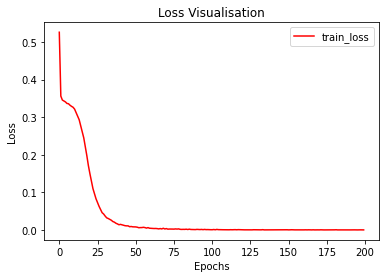

In [ ]:


from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN1_Train_HASOC2019_Test_HASOC2020_TASK_A_Ger_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN1_Train_HASOC2019_Test_HASOC2020_TASK_A_Ger_lossPlot.pdf') 



# Epoch v/s Accuracy Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

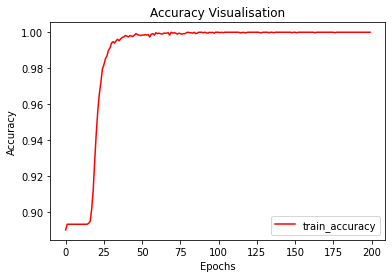

In [ ]:


plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN1_Train_HASOC2019_Test_HASOC2020_TASK_A_Ger_accuracyPlot.pdf',dpi=1000)
files.download('CNN1_Train_HASOC2019_Test_HASOC2020_TASK_A_Ger_accuracyPlot.pdf') 



# Area under Curve-ROC


In [ ]:


pred_train = CNN1_network.predict(padded_clean_text_stem)
pred_test = CNN1_network.predict(padded_clean_text_t_stem)



In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN1_Train_HASOC2019_Test_HASOC2020_TASK_A_Ger_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN1_Train_HASOC2019_Test_HASOC2020_TASK_A_Ger_Area_RocPlot.pdf')

  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

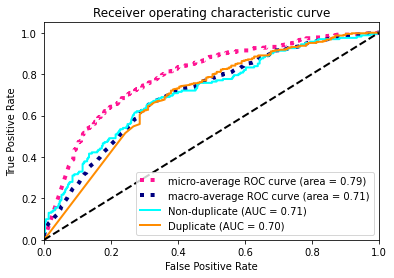

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)